In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import scipy.stats as sstats
from sklearn.model_selection import train_test_split
from sklearn.cluster import Birch
from sklearn.metrics import confusion_matrix

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
data_batch_1 = unpickle('cifar10/data_batch_1')

In [4]:
print(np.array(data_batch_1[b'labels'])[:10])

[6 9 9 4 1 1 2 7 8 3]


In [5]:
print(np.array(data_batch_1[b'data'])[0].shape)

(3072,)


In [6]:
db1_labels = np.array(data_batch_1[b'labels'])
db1_data = np.array(data_batch_1[b'data'])

In [7]:
# print(db1_data[0])
# img2 = cv2.cvtColor(cv2.imread(path2), cv2.COLOR_BGR2RGB)
# plt.imshow(db1_data[0])
# print(db1_data[0].reshape(32,32,3))
print(db1_data[0].reshape(3,1024)[0]) #red
print(db1_data[0].reshape(3,1024)[1]) #green
print(db1_data[0].reshape(3,1024)[2]) #blue

[ 59  43  50 ... 216 151 123]
[ 62  46  48 ... 184 118  92]
[ 63  45  43 ... 140  84  72]


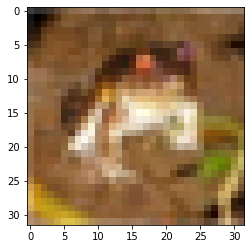

In [8]:
# print(db1_data[0].reshape(3,1024).T)
# print(db1_data[0].reshape(3,1024).T.reshape(32,32,3))
plt.imshow(db1_data[0].reshape(3,1024).T.reshape(32,32,3))

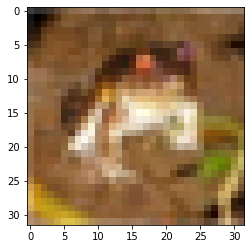

In [9]:
def make_viewable(db_data_photo):
    return db_data_photo.reshape(3,1024).T.reshape(32,32,3)

plt.imshow(make_viewable(db1_data[0]))

In [10]:
print(db1_data.shape)
def make_viewables(db_data_photos):
    res = []
    for i in range(db_data_photos.shape[0]):
        res.append(db_data_photos[i].reshape(3,1024).T.reshape(32,32,3))
    return np.array(res)

db1_df = make_viewables(db1_data)

(10000, 3072)


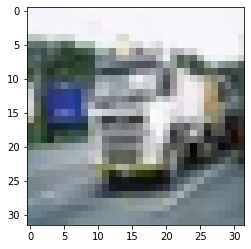

In [11]:
plt.imshow(db1_df[1000])

In [12]:
db1_labels

array([6, 9, 9, ..., 1, 1, 5])

In [13]:
def KNN(train_X, train_Y, test_X, ks, verbose=False):
    """
    Compute predictions for various k
    Args:
        train_X: array of shape Ntrain x D
        train_Y: array of shape Ntrain
        test_X: array of shape Ntest x D
        ks: list of integers
    Returns:
        preds: dict k: predictions for k
    """
    # Cats data to float32
    train_X = train_X.astype(np.float32)
    test_X = test_X.astype(np.float32)

    # Alloc space for results
    preds = {}
    

    if verbose:
        print("Computing distances... ", end='')
    
    dists = -2 * np.dot(train_X, test_X.T) + np.sum(test_X**2, axis=1) + np.sum(train_X**2, axis=1)[:, np.newaxis]
    
    if verbose:
        print("Sorting... ", end='')

    closest = np.argsort(dists, axis=0)

    if verbose:
        print("Computing predictions...", end='')
    
    targets = train_Y[closest]

    for k in ks:
        predictions = sstats.mode(targets[:k])[0]
        predictions = predictions.ravel()
        preds[k] = predictions
    if verbose:
        print("Done")
    return preds

In [14]:
print(db1_df.reshape(10000, 1024, 3)[0])
print(db1_data[0])

[[ 59  62  63]
 [ 43  46  45]
 [ 50  48  43]
 ...
 [216 184 140]
 [151 118  84]
 [123  92  72]]
[ 59  43  50 ... 140  84  72]


In [15]:
trainx, testx, trainy, testy = train_test_split(db1_data, db1_labels, test_size=0.33)

In [16]:
K = [1, 3, 5 ,7]
knn = KNN(trainx, trainy, testx, K)

In [17]:
for k in K:
#     acc = 0
    print(np.round(np.count_nonzero(knn[k] == testy)/len(testy) * 100, 2), "%")

29.03 %
27.39 %
27.76 %
28.48 %


In [18]:
brc = Birch(n_clusters=10, threshold=0.7)
brc.fit(trainx, trainy)

c:\users\krzys\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\cluster\birch.py:299: RuntimeWarning: overflow encountered in ubyte_scalars
  new_ss = self.squared_sum_ + nominee_cluster.squared_sum_
c:\users\krzys\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\cluster\birch.py:627: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (10). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=10,
      threshold=0.7)

In [19]:
brcp = brc.predict(testx)
confusion_matrix(testy, brcp)
# brcp

array([[319,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [322,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [324,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [332,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [349,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [281,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [351,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [328,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [344,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [350,   0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=int64)

## NAIVE BAYES

In [20]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(trainx, trainy)

clfp = clf.predict(testx)
print(np.count_nonzero(clfp == testy)/len(testy))

0.27636363636363637


In [21]:
confusion_matrix(testy, clfp)

array([[111,   9,  16,   5,   8,  23,   7,  24,  79,  37],
       [ 10,  44,   3,   6,   8,  60,  20,  22,  60,  89],
       [ 37,  14,  38,  15,  37,  48,  57,  40,  22,  16],
       [ 10,  10,  26,  24,  15, 115,  31,  47,  13,  41],
       [ 16,   7,  17,   3,  63, 100,  62,  38,  19,  24],
       [  8,   5,  13,  22,  16, 125,  16,  38,  18,  20],
       [  4,  14,  19,  19,  19,  88, 101,  48,  11,  28],
       [ 14,  11,   8,   4,  29,  66,  25,  80,  20,  71],
       [ 33,  17,   2,   6,   2,  53,   1,   7, 149,  74],
       [ 16,  40,   2,   5,   8,  19,  13,  23,  47, 177]], dtype=int64)

In [22]:
def accuracy_plot(axs, accs):
    plt.figure()
    plt.plot(axs, accs)

Rzut na x losowo wybrane osie
KNN accuracy: 10.0 % on 1 axes
KNN accuracy: 14.000000000000002 % on 4 axes
KNN accuracy: 19.0 % on 7 axes
KNN accuracy: 22.0 % on 10 axes
KNN accuracy: 24.0 % on 13 axes
KNN accuracy: 24.0 % on 16 axes
KNN accuracy: 26.0 % on 19 axes


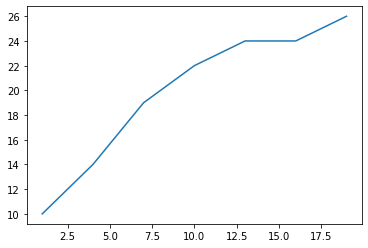

In [23]:
from sklearn import (datasets, decomposition, ensemble, manifold, random_projection)

def sum_up(preds, t):
    print(f"Accuracy: {np.count_nonzero(preds == t)/len(t)} %")
    print(confusion_matrix(t, preds))
    
def sparseRandomProj():
    print("Rzut na x losowo wybrane osie")
    OS = np.arange(1,20,3)
    acc = []
    for oss in OS:
        srp = random_projection.SparseRandomProjection(n_components=oss)
        x_proj = srp.fit_transform(trainx)
        x_test_proj = srp.transform(testx)
        knn = KNN(x_proj, trainy, x_test_proj, [7])

        temp_acc = np.round(np.count_nonzero(knn[7] == testy)/len(testy),2)*100
        acc.append(temp_acc)
        print(f"KNN accuracy: {temp_acc} % on {oss} axes")
    accuracy_plot(OS, acc)

sparseRandomProj()

PCA
KNN accuracy: 28.999999999999996 % on 10 axes
KNN accuracy: 32.0 % on 13 axes
KNN accuracy: 32.0 % on 16 axes
KNN accuracy: 33.0 % on 19 axes
KNN accuracy: 33.0 % on 22 axes
KNN accuracy: 34.0 % on 25 axes
KNN accuracy: 35.0 % on 28 axes
KNN accuracy: 34.0 % on 31 axes


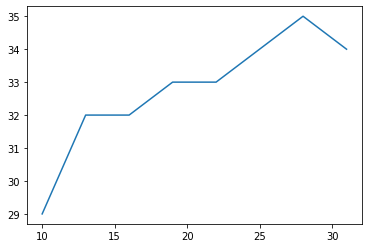

In [24]:
def pca():
    print("PCA")
    OS = np.arange(10,33,3)

    accs = []
    for oss in OS:
        pca = decomposition.PCA(n_components=oss)
        x_proj = pca.fit_transform(trainx)
        x_test_proj = pca.transform(testx)
        knn = KNN(x_proj, trainy, x_test_proj, [7])

    #     sum_up(knn[7], testy)
        temp_acc = np.round(np.count_nonzero(knn[7] == testy)/len(testy),2)*100
        accs.append(temp_acc)
        print(f"KNN accuracy: {temp_acc} % on {oss} axes")

    accuracy_plot(OS, accs)
    
pca()

KPCA


MemoryError: Unable to allocate array with shape (6700, 6700) and data type float64